# HyperToolsを使ってみる
## HyperTools
- http://hypertools.readthedocs.io/en/latest/
- 高次元データを可視化、次元削減して扱うためのライブラリ
- matplotlib,seabornベース

## 導入
### 参考
- https://github.com/ContextLab/hypertools (github)
- http://hypertools.readthedocs.io/en/latest/ (document)
- http://blog.kaggle.com/2017/04/10/exploring-the-structure-of-high-dimensional-data-with-hypertools-in-kaggle-kernels/

### インストール
- githubの手順にしたがってインストール
```
$ pip install hypertools
```


In [1]:
import hypertools as hyp
import numpy as np
import scipy
import pandas as pd
from scipy.linalg import toeplitz
from copy import copy

%matplotlib inline

# Plotting

## Mushrooms
- hypertools付属のサンプルデータを利用してプロットの練習
- 22カラムx8,124サンプルのきのこの特徴データ
- データはテキストデータ

In [2]:
geo = hyp.load('mushrooms')
mushrooms = geo.get_data()
mushrooms.head()

,bruises,cap-color,cap-shape,cap-surface,gill-attachment,gill-color,gill-size,gill-spacing,habitat,odor,...,ring-type,spore-print-color,stalk-color-above-ring,stalk-color-below-ring,stalk-root,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,veil-color,veil-type
0,t,n,x,s,f,k,n,c,u,p,...,p,k,w,w,e,e,s,s,w,p
1,t,y,x,s,f,k,b,c,g,a,...,p,n,w,w,c,e,s,s,w,p
2,t,w,b,s,f,n,b,c,m,l,...,p,n,w,w,c,e,s,s,w,p
3,t,w,x,y,f,n,n,c,u,p,...,p,k,w,w,e,e,s,s,w,p
4,f,g,x,s,f,k,b,w,g,n,...,e,n,w,w,e,t,s,s,w,p


### 3次元プロット
- 3次元以上のデータの場合、PCAを行い、第3主成分を3DPlotする。

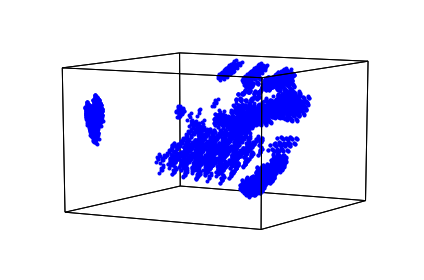

In [3]:
geo = hyp.plot(mushrooms, fmt='b.')

### 2次元プロット
- ndimを指定することで、第2主成分までで2次元プロットも可能。

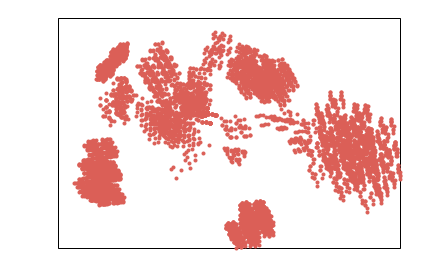

In [4]:
geo = hyp.plot(mushrooms, '.', ndims=2)

### 他の次元削減手法
- defaultではPCAだが、他の手法も使える
- 以下の手法が使えるらしい
    - PCA, IncrementalPCA, SparsePCA, MiniBatchSparsePCA, KernelPCA, FastICA, FactorAnalysis, TruncatedSVD, DictionaryLearning, MiniBatchDictionaryLearning, TSNE, Isomap, SpectralEmbedding, LocallyLinearEmbedding, MDS, UMAP

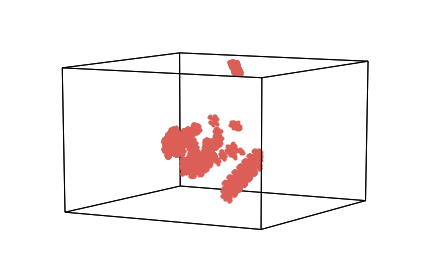

In [5]:
geo = hyp.plot(mushrooms, '.', reduce='SparsePCA')

- 次元削減手法のパラメータを辞書形式にして指定できる
- 指定するパラメータはscikit-learn参照

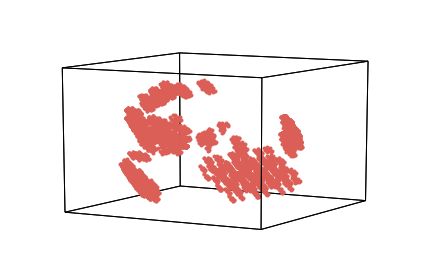

In [6]:
geo = hyp.plot(mushrooms, '.', reduce={'model' : 'PCA', 'params' : {'whiten' : True}})

### グループ毎の色分け
- hueオプションでグループラベルを指定
    - int, float, string, noneのリストでグループラベルを指定できる

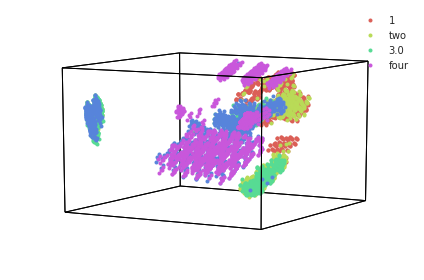

In [7]:
split = int(mushrooms.shape[0]/5) # mushroomデータセットは同じ数の5種類のデータから成り立っている
hue = [1]*split + ['two']*split + [3.0]*split + [None]*split + ['four']*split
geo_hue = hyp.plot(mushrooms, '.', hue=hue, legend=True)

### クラスタリング
- scikit-learnのk-meansクラスタリングによって、クラスタリングする
- 他のクラスタリング手法も使えるらしい

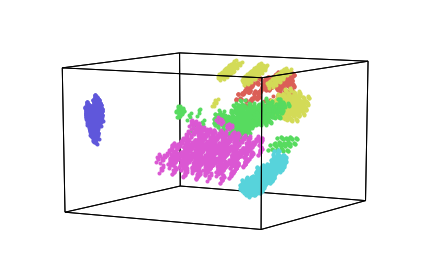

In [8]:
geo_cluster = hyp.plot(mushrooms, '.', n_clusters = 6)

## iris
- irisデータも使って見よう

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

print(df_iris.shape)
df_iris.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


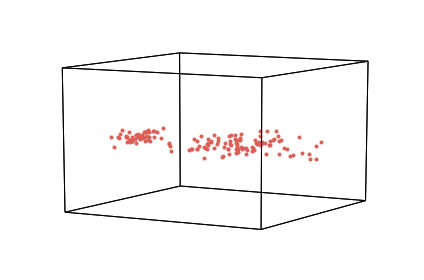

In [10]:
geo = hyp.plot(df_iris, fmt='.')

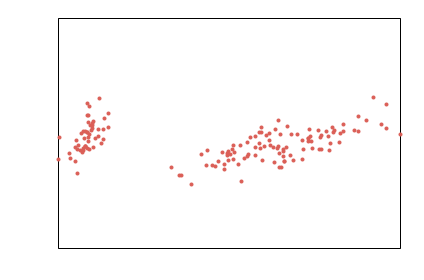

In [11]:
geo = hyp.plot(df_iris, '.', ndims=2)

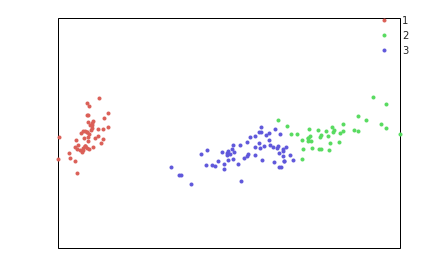

In [12]:
geo_cluster = hyp.plot(df_iris, '.', n_clusters = 3, legend=True, ndims=2)

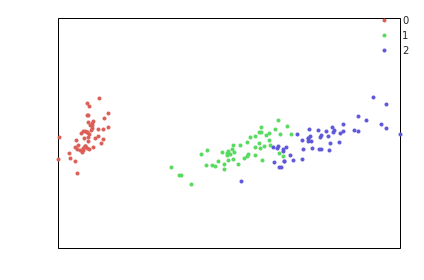

In [13]:
geo_hue = hyp.plot(df_iris, '.', hue=iris.target, legend=True, ndims=2)

# 次元削減
- plotの方法は上記の通り
- 次元削減したデータを他に利用するときにはどうするか
    - reduce関数を使う
    - 結局scikit-learnを使っているので、直接sklearn叩けば良い
- clusteringも同様

In [14]:
import matplotlib.pyplot as plt

## PCA

In [15]:
c_arr = ['red', 'blue', 'green']

ドキュメントには、次元数指定しないと3次元に圧縮するよと書いてあるが、そうならなくない？
次元数指定しないと圧縮しないよね？？

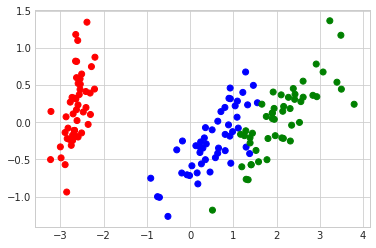

In [16]:
r_iris = hyp.reduce(df_iris, ndims=2)
plt.scatter(r_iris[:,0], r_iris[:,1], c=[c_arr[i] for i in iris.target])

## 他の次元削減もできる（TSNE）

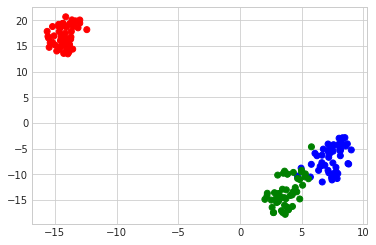

In [17]:
r_iris = hyp.reduce(df_iris, ndims=2, reduce='TSNE')
plt.scatter(r_iris[:,0], r_iris[:,1], c=[c_arr[i] for i in iris.target])